In [150]:
# importing libraries
import pandas as pd
from sklearn import linear_model
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [151]:
# Loading the train and test data
train_df = pd.read_csv('../data/BikeRentalDaily_train.csv', delimiter=';')
test_df = pd.read_csv('../data/BikeRentalDaily_test.csv', delimiter=';')

In [152]:
# Minimal Preprocessing steps
# removing the 'dteday'  and 'instant' feature
train_df = train_df.drop('dteday', axis=1).drop('instant', axis=1)
test_df = test_df.drop('dteday', axis=1).drop('instant', axis=1)

In [153]:
# Replacing all MissingValues with the most frequent values
imp_most_freq = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

train_df[:] = imp_most_freq.fit_transform(train_df)
test_df[:] = imp_most_freq.fit_transform(test_df)

C:\Users\Akira\AppData\Local\Temp\ipykernel_9700\2020034284.py:4: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  train_df[:] = imp_most_freq.fit_transform(train_df)
C:\Users\Akira\AppData\Local\Temp\ipykernel_9700\2020034284.py:5: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  test_df[:] = imp_most_freq.fit_transform(test_df)


In [154]:
# Splitting the train data into features and labels
train_features = train_df.iloc[:, :13]
train_labels = train_df.iloc[:, -1:]

# Splitting the test data into features and labels
test_features = test_df.iloc[:, :13]
test_labels = test_df.iloc[:, -1:]

In [164]:
train_features
#train_labels

#test_features
#test_labels

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,leaflets,price reduction
0,2.0,0.0,6.0,0.0,5.0,1.0,1.0,24.8000,0.587133,53.12505,0.253121,991.0,0.0
1,4.0,1.0,11.0,0.0,4.0,1.0,2.0,12.8667,0.324492,93.06255,0.152987,601.0,0.0
2,1.0,1.0,1.0,0.0,2.0,1.0,1.0,6.0000,0.126275,66.18750,0.365671,549.0,0.0
3,2.0,1.0,4.0,1.0,1.0,0.0,1.0,26.5667,0.614925,84.25005,0.284829,740.0,0.0
4,1.0,1.0,3.0,0.0,-1.0,0.0,2.0,20.5667,0.505046,113.37495,0.110704,773.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,1.0,0.0,3.0,0.0,6.0,0.0,1.0,18.9000,0.466525,56.87505,0.368167,1022.0,1.0
596,1.0,0.0,3.0,0.0,2.0,1.0,1.0,17.6667,0.440642,93.68745,0.225750,551.0,0.0
597,1.0,1.0,1.0,0.0,4.0,1.0,2.0,15.3000,0.381938,120.43755,0.180967,520.0,0.0
598,4.0,0.0,10.0,0.0,3.0,1.0,2.0,19.3667,0.472846,108.06255,0.148642,605.0,0.0


In [156]:
test_labels.to_numpy()

array([[ 3894.],
       [ 5936.],
       [ 5629.],
       [ 3310.],
       [ 4748.],
       [ 1450.],
       [ 7040.],
       [ 6778.],
       [ 5119.],
       [ 4332.],
       [ 5115.],
       [ 6598.],
       [ 2496.],
       [ 5464.],
       [ 6118.],
       [ 7580.],
       [ 6883.],
       [ 2432.],
       [ 5375.],
       [ 6227.],
       [ 7852.],
       [ 1115.],
       [ 4687.],
       [ 2056.],
       [ 4484.],
       [ 5302.],
       [ 4220.],
       [ 4911.],
       [ 6734.],
       [ 3873.],
       [ 6234.],
       [ 7105.],
       [ 7538.],
       [ 4507.],
       [ 1421.],
       [ 4367.],
       [ 1817.],
       [ 2134.],
       [ 2431.],
       [ 5202.],
       [ 5538.],
       [ 1550.],
       [ 2485.],
       [ 4342.],
       [ 4036.],
       [  683.],
       [ 3644.],
       [ 7534.],
       [ 4541.],
       [ 5499.],
       [ 7363.],
       [ 4401.],
       [ 7592.],
       [ 3387.],
       [ 3523.],
       [ 5102.],
       [ 5698.],
       [ 3577.],
       [ 5668.

In [157]:
# Model building
# We use linear regression, which is a supervised learning technique 
# with usage of labeled training data.
reg_model_before_pp = linear_model.LinearRegression()

reg_model_before_pp.fit(train_features, train_labels)

print(reg_model_before_pp.coef_)

[[ 3.14720871e+02  2.45003617e+03  3.48270214e+01 -1.02268918e+03
   1.85177086e+02 -4.75957122e+02 -7.66348093e+02 -1.16757400e+01
   7.76810092e+03 -6.60174333e+00 -6.54686788e+02  8.65992328e-01
   2.62214091e+02]]


In [158]:
# Predict all test examples
ypred = reg_model_before_pp.predict(test_features)
ypred

array([[3353.98310551],
       [5064.51273616],
       [6865.64762334],
       [2334.9962789 ],
       [3454.5052859 ],
       [ 658.77972346],
       [7578.00917543],
       [5812.66161076],
       [6758.25067904],
       [6123.29108968],
       [5347.08372714],
       [7482.66186024],
       [3333.53004277],
       [8117.40219152],
       [6646.74108984],
       [7887.00846207],
       [7378.66651865],
       [2375.30384163],
       [5449.19355696],
       [7671.06383178],
       [7447.99945677],
       [4949.49164053],
       [4123.64243871],
       [1180.36472331],
       [6261.73301697],
       [5629.89771713],
       [5868.77340849],
       [4692.58623036],
       [7772.42926166],
       [5519.16944372],
       [6131.22419193],
       [7578.63336818],
       [7192.17935235],
       [5540.49777094],
       [1262.45925762],
       [5715.27595917],
       [2606.87718428],
       [1315.6146659 ],
       [2743.35117817],
       [5275.27325459],
       [5293.77607259],
       [1283.117

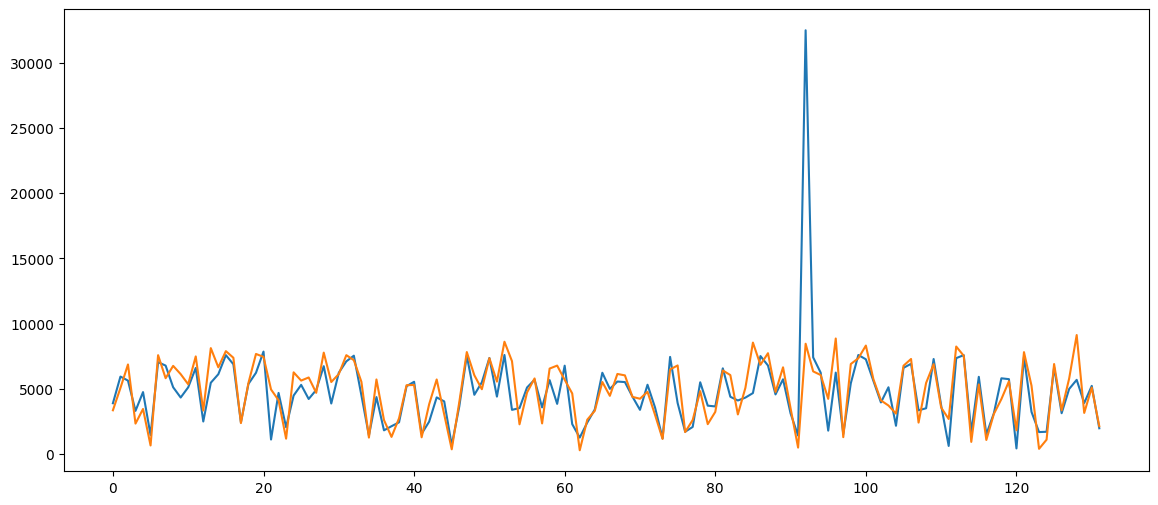

In [166]:
plt.figure(figsize=(14,6))
plt.plot(test_labels)
plt.plot(ypred)

In [161]:
print(f"Predict label for following example:\n{test_features.iloc[0,:]}")

#Predict a single value
predicted_value = reg_model_before_pp.predict([test_features.iloc[0,:]])[0]

print("\nPredicted label: ",predicted_value)
print("Actual label:", test_labels.iloc[0])
print("Deviation predicted from actual value: ",predicted_value - test_labels.iloc[0])

Predict label for following example:
season               4.000000
yr                   0.000000
mnth                10.000000
holiday              0.000000
weekday              3.000000
workingday           1.000000
weathersit           2.000000
temp                19.366700
atemp                0.472846
hum                108.062550
windspeed            0.148642
leaflets           605.000000
price reduction      0.000000
Name: 0, dtype: float64

Predicted label:  [3353.98310551]
Actual label: cnt    3894.0
Name: 0, dtype: float64
Deviation predicted from actual value:  cnt   -540.016894
Name: 0, dtype: float64


c:\Users\Akira\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [162]:
print(round(ypred[:10] - test_labels.iloc[0:10])*100000, 2)

           cnt
0  -54000000.0
1  -87100000.0
2  123700000.0
3  -97500000.0
4 -129300000.0
5  -79100000.0
6   53800000.0
7  -96500000.0
8  163900000.0
9  179100000.0 2


In [163]:
# Evaluate model

#Return Mean Absolute Error -> Loss: The beste Value is 0.0
mae = mean_absolute_error(test_labels, ypred)
print('MAE: %.3f' % mae)

#Return the coefficient of determination R^2 of the prediction -> Score: best possible value is 1.0
print("R^2 value of the model: ",reg_model_before_pp.score(test_features, test_labels))

MAE: 1070.073
R^2 value of the model:  0.39686633532624505
